<a href="https://colab.research.google.com/github/GaBevilacqua/CD/blob/Australia/Melbourne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub

In [ ]:
import pandas as pd
import numpy as np
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet
import folium

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = "melb_data.csv"
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "dansbecker/melbourne-housing-snapshot",
  file_path)


<ipython-input-1-62a951c6dff7>:21: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


# AE - Visualizar primeiras 5 linhas

In [ ]:
display(df.head())


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# AE -Informações

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

#AE -Estatisticas Descritivas

In [ ]:
display(df.describe())

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
# Valores Nulos

In [ ]:
display(df.isnull().sum())

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


# AE -Gráficos

Distribuição de preço dos imóveis

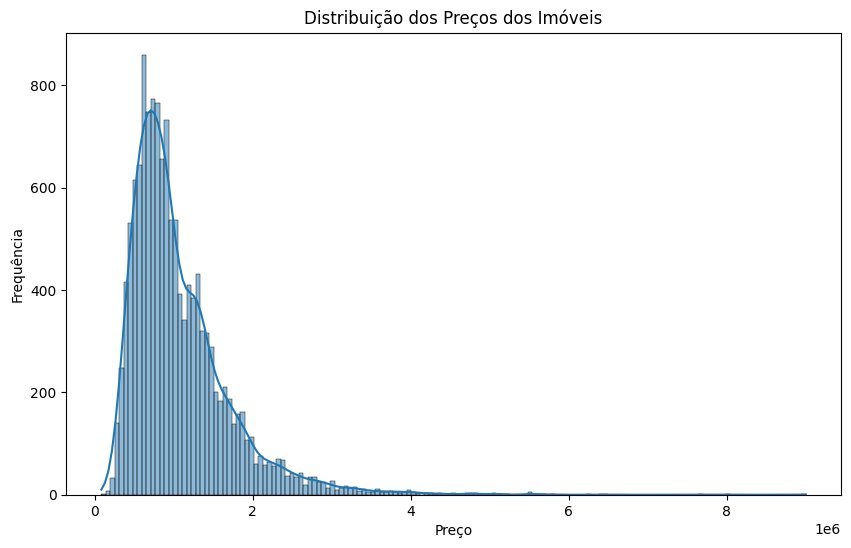

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df['Price'], kde=True)
plt.title('Distribuição dos Preços dos Imóveis')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

Distribuição por quartos

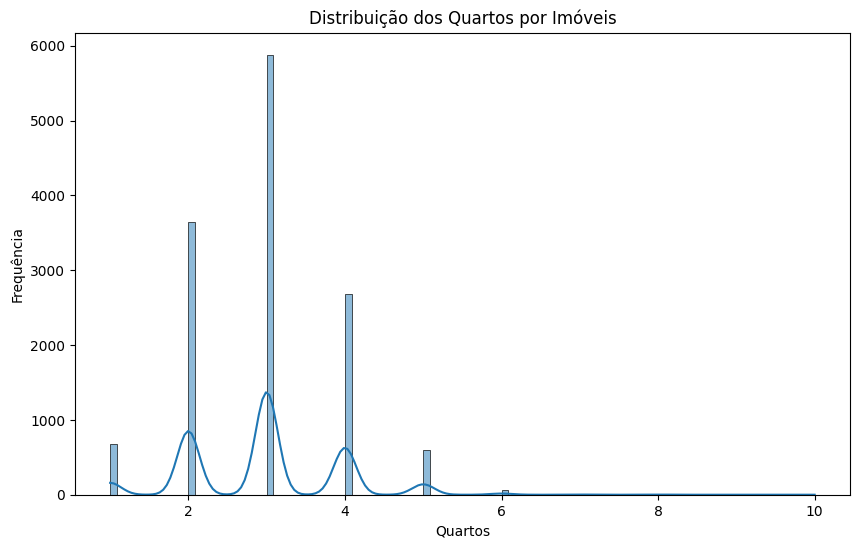

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df['Rooms'], kde=True)
plt.title('Distribuição dos Quartos por Imóveis')
plt.xlabel('Quartos')
plt.ylabel('Frequência')
plt.show()

Distribuição de Landsize

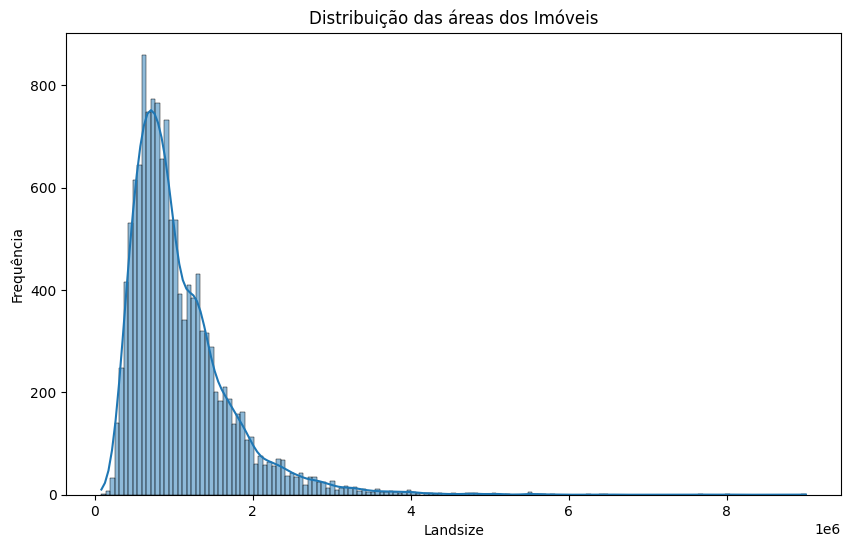

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df['Price'], kde=True)
plt.title('Distribuição das áreas dos Imóveis')
plt.xlabel('Landsize')
plt.ylabel('Frequência')
plt.show()

Análise Bivariada:
Preço x Tipo de Propriedade

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

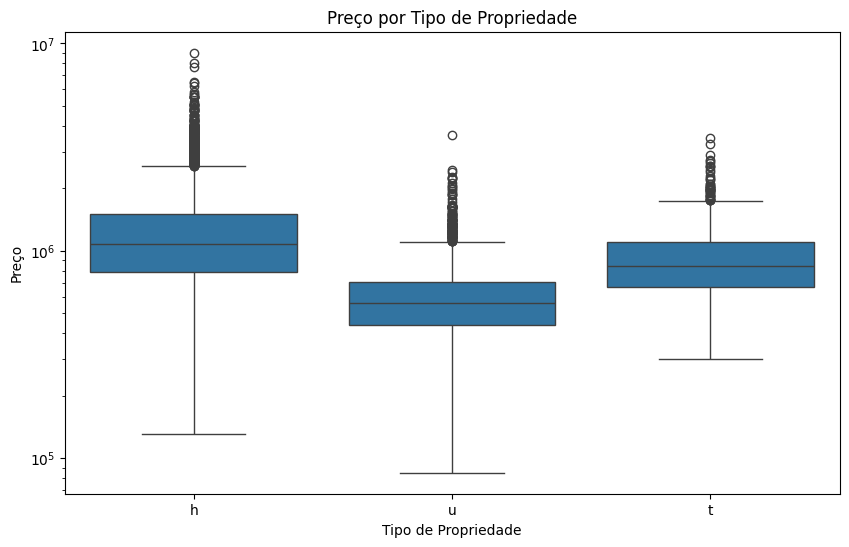

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Type', y='Price', data=df)
plt.title('Preço por Tipo de Propriedade')
plt.ylabel("Preço")
plt.xlabel("Tipo de Propriedade")
plt.yscale('log')
plt.show()

**Preço em relação a distancia**

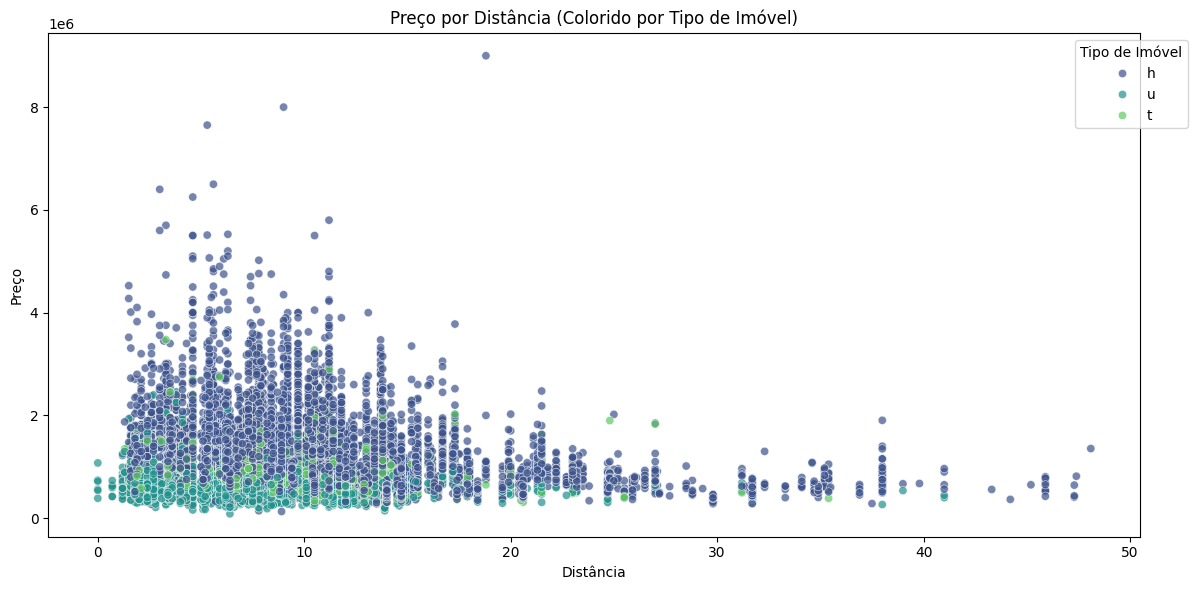

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Distance', y='Price', hue='Type', palette='viridis', alpha=0.7)
plt.title("Preço por Distância (Colorido por Tipo de Imóvel)")
plt.xlabel("Distância")
plt.ylabel("Preço")
plt.legend(title='Tipo de Imóvel', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


**Mapa de Calor**

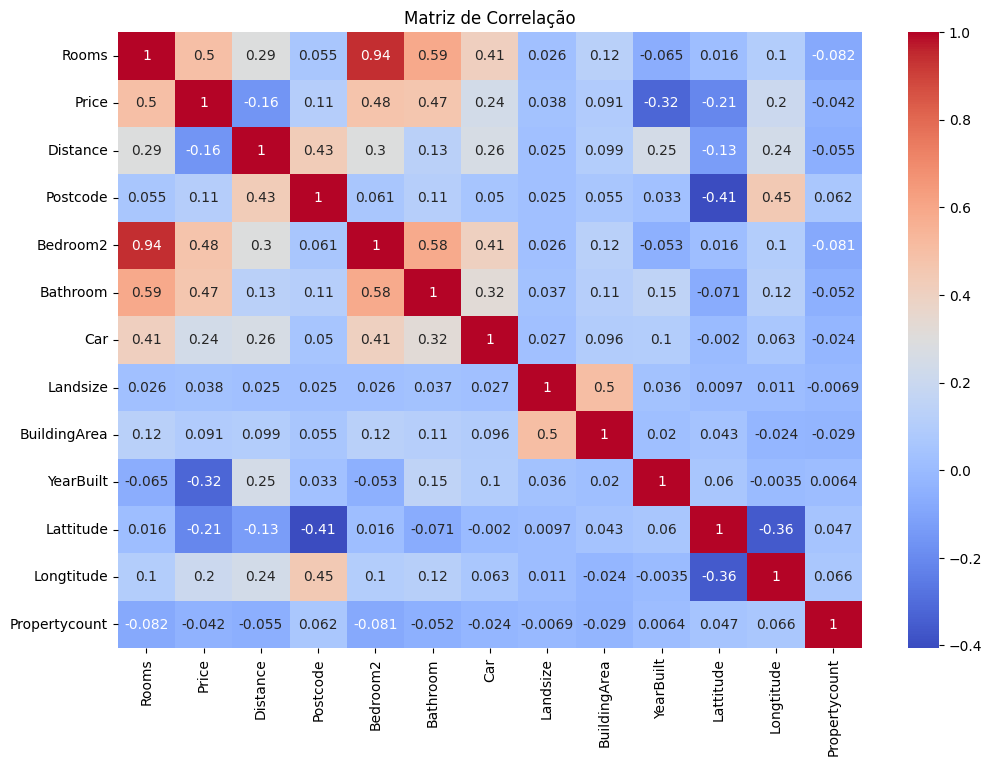

In [ ]:
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

**Histrograma**

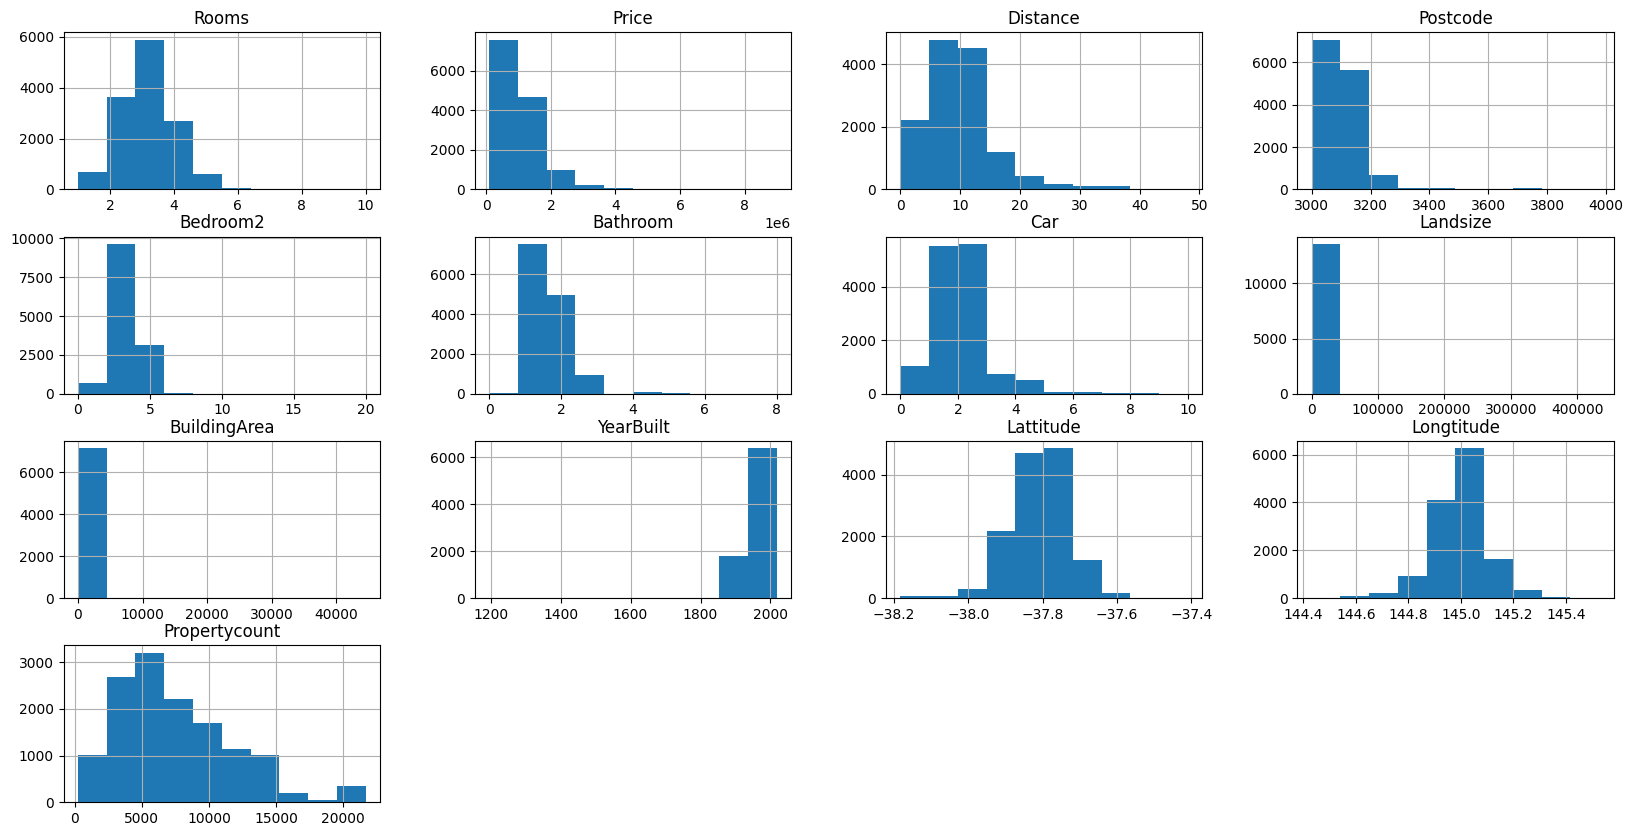

In [ ]:
df.hist(figsize=(20,10));

**Por região**


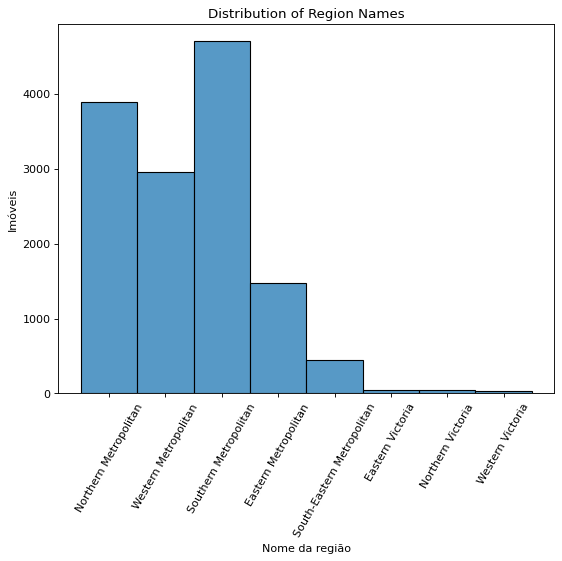

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data=df, x='Regionname')
plt.title("Distribution of Region Names")
plt.xlabel("Nome da região")
plt.ylabel("Imóveis")
plt.xticks(rotation=60)
plt.show()

<ipython-input-39-e5b13328a022>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{interval.left:.1f}-{interval.right:.1f}"
<ipython-input-39-e5b13328a022>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{interval.left:.1f}-{interval.right:.1f}"
<ipython-input-39-e5b13328a022>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{interval.left:.1f}-{interval.right:.1f}"


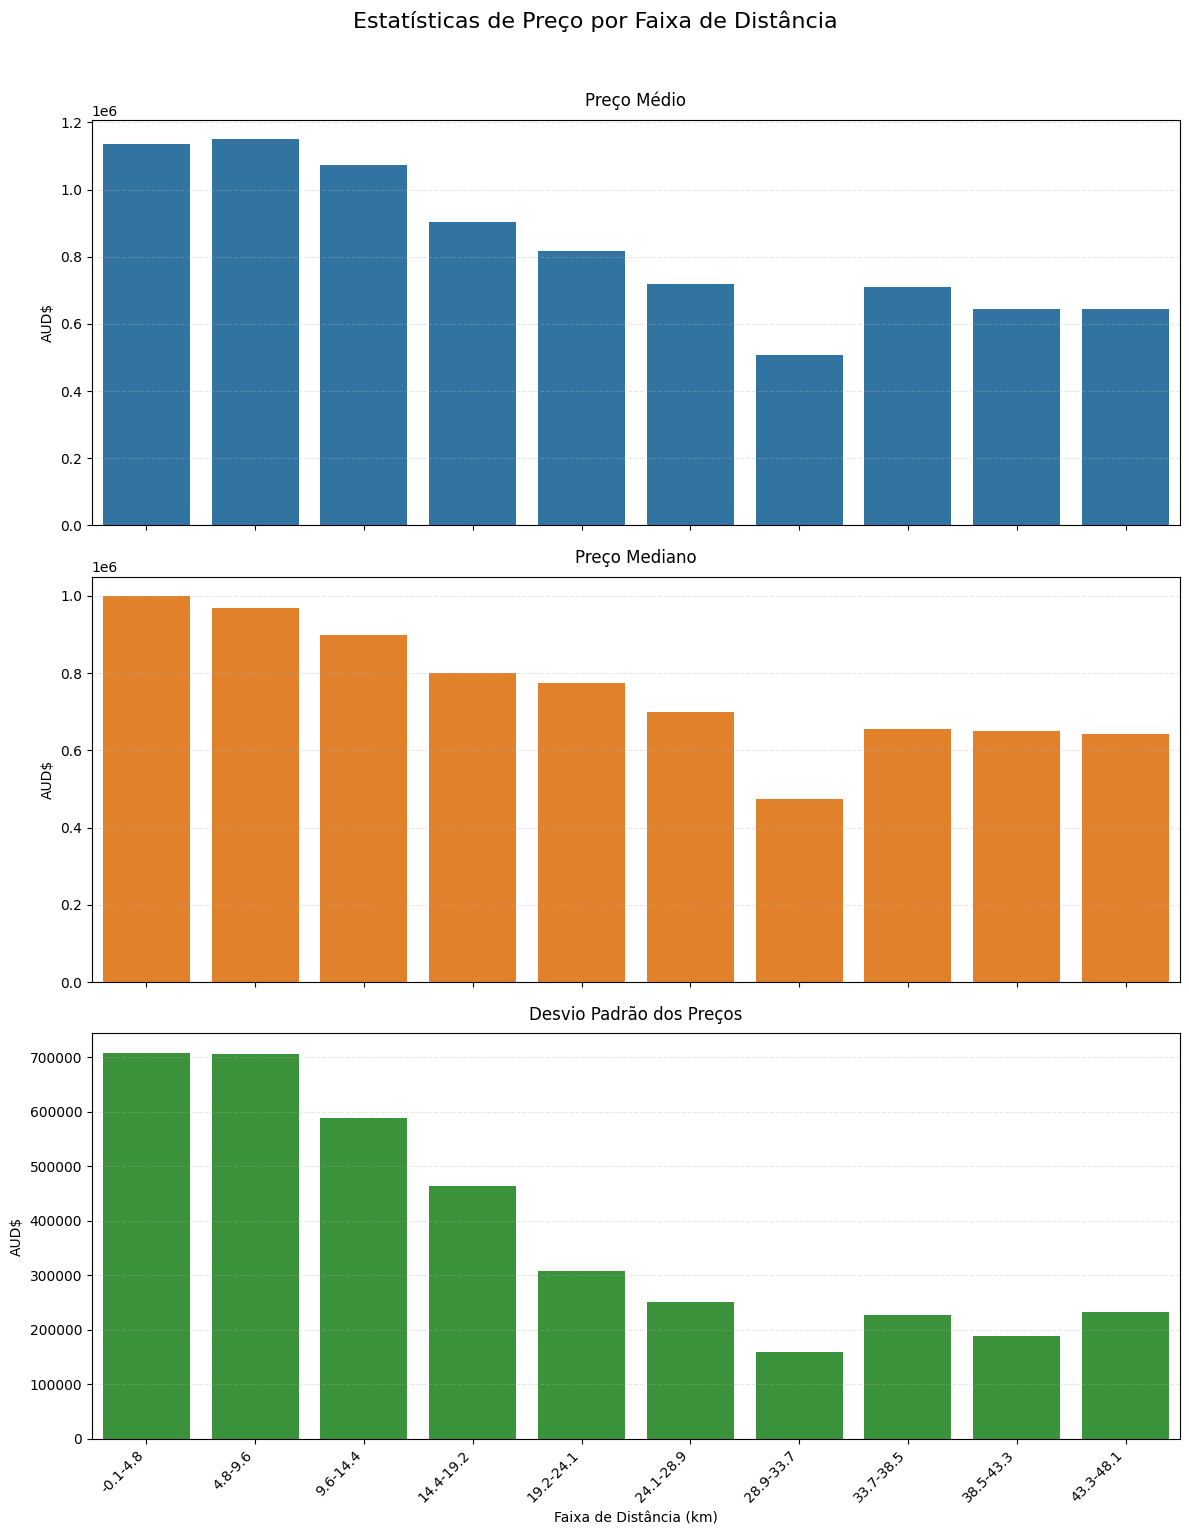

In [ ]:
df['Faixa_Distancia'] = pd.cut(df['Distance'], bins=10, precision=1)
df_stats = df.groupby('Faixa_Distancia', observed=True)['Price'].agg(
    ['mean', 'median', 'std']).reset_index()
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)
plt.suptitle('Estatísticas de Preço por Faixa de Distância', y=1.02, fontsize=16)

# Média
sns.barplot(data=df_stats, x='Faixa_Distancia', y='mean', ax=axes[0], color='#1f77b4')
axes[0].set_title('Preço Médio', pad=10)
axes[0].set_ylabel('AUD$')
axes[0].grid(axis='y', linestyle='--', alpha=0.3)

# Mediana
sns.barplot(data=df_stats, x='Faixa_Distancia', y='median', ax=axes[1], color='#ff7f0e')
axes[1].set_title('Preço Mediano', pad=10)
axes[1].set_ylabel('AUD$')
axes[1].grid(axis='y', linestyle='--', alpha=0.3)

# Desvio Padrão
sns.barplot(data=df_stats, x='Faixa_Distancia', y='std', ax=axes[2], color='#2ca02c')
axes[2].set_title('Desvio Padrão dos Preços', pad=10)
axes[2].set_ylabel('AUD$')
axes[2].set_xlabel('Faixa de Distância (km)')
axes[2].grid(axis='y', linestyle='--', alpha=0.3)

for ax in axes:
    ax.set_xticklabels([f"{interval.left:.1f}-{interval.right:.1f}"
                      for interval in df_stats['Faixa_Distancia']],
                     rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Mapear Método**

In [ ]:
method_mapping = {
    'S': 'Sold',
    'SP': 'Sold Prior',
    'PI': 'Passed In',
    'PN': 'Sold Prior Not Disclosed',
    'SN': 'Sold Not Disclosed',
    'NB': 'No Bid',
    'VB': 'Vendor Bid',
    'W': 'Withdrawn',
    'SA': 'Sold After Auction',
    'SS': 'Sold After Auction (Price Not Disclosed)',
    'N/A': 'Not Available'
}

df['Method_Desc'] = df['Method'].map(method_mapping)

**Preço Médio por Faixa de Distância e Método de Venda**

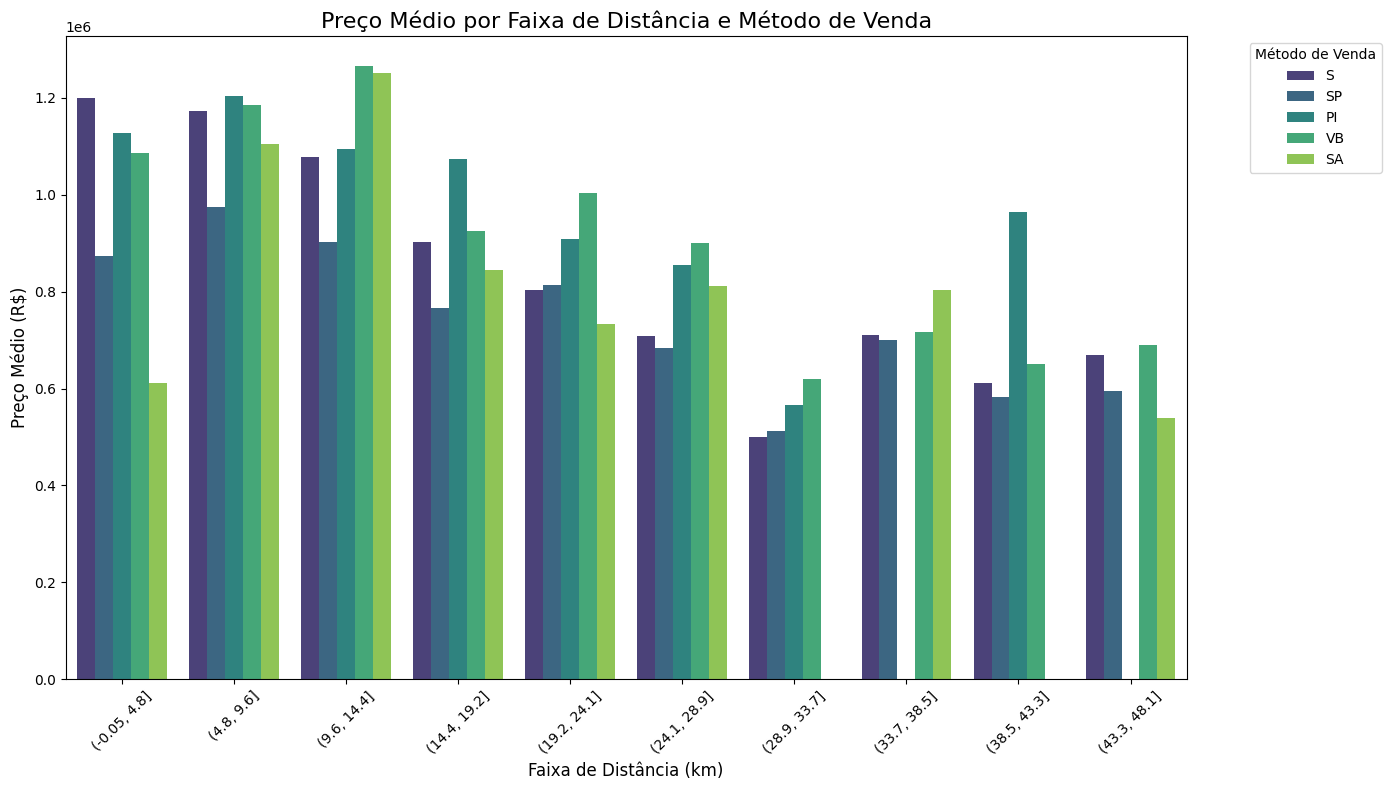

In [ ]:
top_methods = df['Method'].value_counts().nlargest(5).index
df_filtered = df[df['Method'].isin(top_methods)]

plt.figure(figsize=(14, 8))
sns.barplot(data=df_filtered,
            x='Faixa_Distancia',
            y='Price',
            hue='Method',
            estimator='mean',
            errorbar=None,
            palette='viridis',
            order=sorted(df_filtered['Faixa_Distancia'].unique()))


plt.title('Preço Médio por Faixa de Distância e Método de Venda', fontsize=16)
plt.xlabel('Faixa de Distância (km)', fontsize=12)
plt.ylabel('Preço Médio (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Método de Venda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Scatter Plots de Preço, Distancia e Landsize**

<Axes: xlabel='Distance', ylabel='Price'>

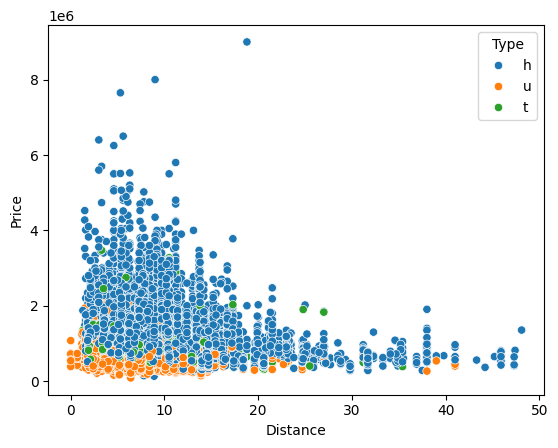

In [ ]:
sns.scatterplot(data=df, x='Distance', y='Price', hue='Type')

**Violinplot Distribuição de Preço para cada Tipo de residencia**

In [ ]:
#plt.figure(figsize=(8, 6), dpi=80)
#sns.countplot(data=df, y='Suburb')

# Regreção

In [ ]:
X = df[['Rooms', 'Distance', 'Landsize']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ",mae)
r2 = r2_score(y_test, y_pred)
print("MAPE: ",r2)

MSE:  264084022444.48544
MAE:  355825.3424400924
MAPE:  0.3351590843273342


Definindo Modelos

In [ ]:
# 1. Regressão Linear Simples
lr = LinearRegression().fit(X_train, y_train)

# 2. Ridge Regression (L2)
ridge = Ridge(alpha=1.0).fit(X_train, y_train)

# 3. Lasso Regression (L1)
lasso = Lasso(alpha=0.1).fit(X_train, y_train)

# 4. Regressão Polinomial (grau 2)
poly = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
).fit(X_train, y_train)

# 5. Elastic Net (L1 + L2)
enet = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X_train, y_train)

# Dicionário de modelos
models = {
    "Linear": lr,
    "Ridge": ridge,
    "Lasso": lasso,
    "Polinomial": poly,
    "ElasticNet": enet
}

Gráficp para revisões

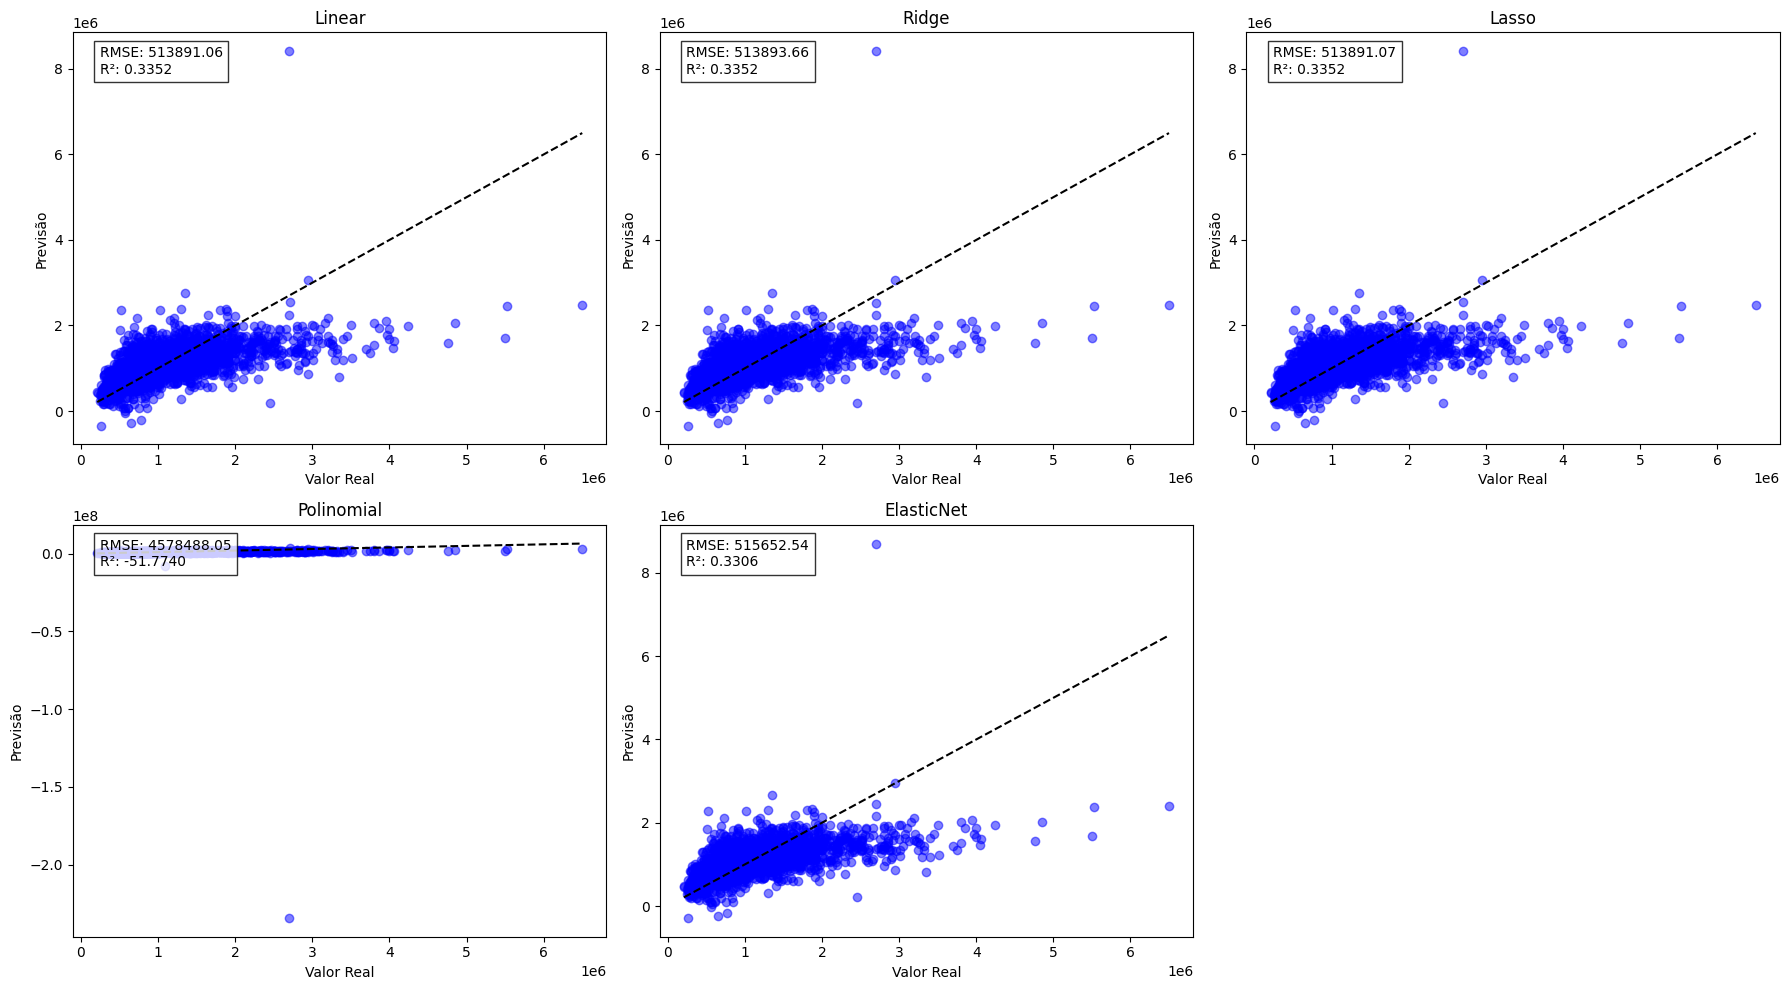

In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)

    axes[i].scatter(y_test, y_pred, alpha=0.5, color='blue')
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Valor Real')
    axes[i].set_ylabel('Previsão')

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    axes[i].text(0.05, 0.9, f'RMSE: {rmse:.2f}\nR²: {r2:.4f}',
                transform=axes[i].transAxes, bbox=dict(facecolor='white', alpha=0.8))

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

Residuos

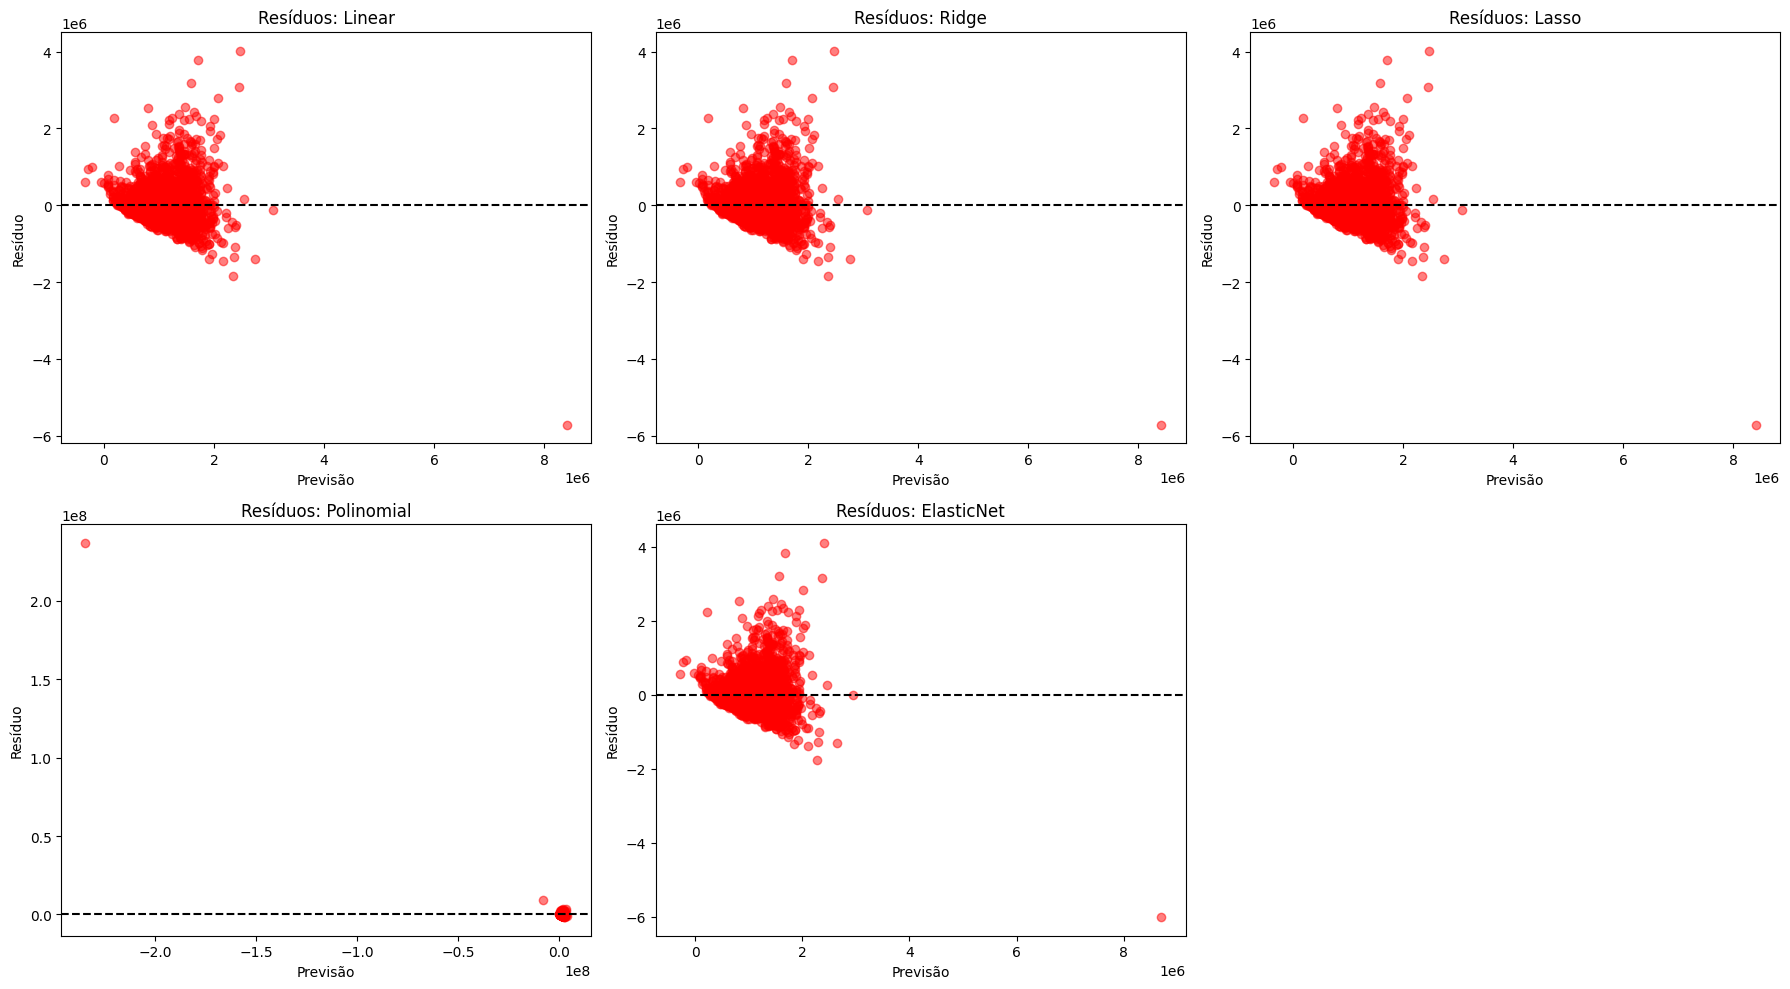

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    axes[i].scatter(y_pred, residuals, alpha=0.5, color='red')
    axes[i].axhline(y=0, color='k', linestyle='--')
    axes[i].set_title(f'Resíduos: {name}')
    axes[i].set_xlabel('Previsão')
    axes[i].set_ylabel('Resíduo')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

# Series Temporais

# GeoPandas

In [16]:
!pip install geopandas==0.10.2 rtree pygeos mapclassify -q


In [18]:
import geopandas as gpd
import zipfile
import requests
import io
import os

# URL direta para o ZIP dos dados da ABS (GCCSA 2021 shapefile)
url = "https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/datasets/2021-gccsa-shapefile.zip"

# Faz o download do conteúdo
response = requests.get(url)
if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        z.extractall("gccsa_shapefiles")
else:
    print("Erro ao baixar o arquivo:", response.status_code)

# Carrega o shapefile
shapefile_path = "gccsa_shapefiles/STE_2021_AUST_GCCSA.shp"
gdf = gpd.read_file(shapefile_path)

# Filtra a região de Greater Melbourne
melbourne = gdf[gdf['GCCSA_NAME21'] == 'Greater Melbourne']
melbourne.plot()


Erro ao baixar o arquivo: 404


DataSourceError: gccsa_shapefiles/STE_2021_AUST_GCCSA.shp: No such file or directory